## <span style="color:#a4d4a3">**Graph-Based SLAM with Landmarks**</span>


<span style="color:#00703c">**Recap:**</span>

- Use a <span style="color:#ffa500">**graph**</span> to represent the SLAM problem.  

- Every <span style="color:#ffa500">**node**</span> in the graph corresponds to a <span style="color:#ffa500">**pose**</span> of the robot during mapping. 

- Every <span style="color:#ffa500">**edge**</span> between two nodes corresponds to a <span style="color:#ffa500">**spatial constraint**</span> between them.  

<span style="color:#00703c">**Graph-based SLAM:**</span> 

- Build the graph and find a node configuration that <span style="color:#ffa500">**minimizes the error**</span> introduced by these constraints.

#### 🔗 <span style="color:#a4d4a3">**The Graph**</span>

So far:

- <span style="color:#ffa500">**Vertices:**</span> represent robot <span style="color:#ffa500">**poses**</span> $(x, y, \theta)$.  

- <span style="color:#ffa500">**Edges:**</span> represent virtual <span style="color:#ffa500">**observations**</span> (transformations) between robot poses.

This module's topic:

- <span style="color:#00703c">***How to Deal with Landmarks?***</span>

<p align="center">
  <img src="../figures/3_least_squares/slam_course-landmark_graph.png" alt="Simpe Graph" width="500"/>
</p>

##### <span style="color:#a4d4a3">The Graph with Landmarks</span>

<span style="color:#ffa500">**Nodes**</span> can represent:

- Robot poses  

- Landmark locations  

<span style="color:#ffa500">**Edges**</span> can represent:

- Landmark observations  

- Odometry measurements  

The <span style="color:#ffa500">**minimization**</span> now optimizes both the landmark locations and the robot poses.

---


### 🗽 <span style="color:#a4d4a3">**2D Landmarks**</span>

- A <span style="color:#ffa500">**landmark**</span> is a $(x, y)$ point in the world.  

- Relative observation is also in $(x, y)$.

#### 🔭 <span style="color:#a4d4a3">**Landmark Observation**</span>

<span style="color:#ffa500">**Expected observation**</span> (using an $x, y$ sensor):

$$
\hat{\mathbf{z}}_{ij}(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{R}_i^T (\mathbf{x}_j - \mathbf{t}_i)
$$

- $\mathbf{R}_i$: rotation matrix of robot pose $i$.  

- $\mathbf{t}_i$: robot translation.  

- $\mathbf{x}_j$: landmark position.

As we have seen before, the <span style="color:#ffa500">**error function**</span> is:

$$
\begin{aligned}
\mathbf{e}_{ij}(\mathbf{x}_i, \mathbf{x}_j) &= \hat{\mathbf{z}}_{ij} - \mathbf{z}_{ij} \\
&= \mathbf{R}_i^T (\mathbf{x}_j - \mathbf{t}_i) - \mathbf{z}_{ij}
\end{aligned}
$$

#### ∠ <span style="color:#a4d4a3">**Bearing-Only Observations**</span>

In many real-world scenarios, sensors <span style="color:#ffa500">**do not provide range (distance)**</span> information. They only measure the <span style="color:#ffa500">**direction (bearing)**</span> of a feature relative to the robot.  

A simple examples is:

- <span style="color:#ffa500">**Cameras:**</span> A visual feature (corner, object, landmark) can be detected in the <span style="color:#ffa500">**image plane**</span>, but its actual distance is unknown without additional geometric reasoning or motion.  

- <span style="color:#ffa500">**Directional antennas:**</span> Measure direction to a source but not range.  

- <span style="color:#ffa500">**Monocular SLAM:**</span> The single camera setup can only estimate bearing to features; depth has to be inferred gradually through <span style="color:#ffa500">**motion**</span> (triangulation).


While the robot observes only the <span style="color:#ffa500">**bearing**</span> toward the landmark, it is still a 2D point.

<span style="color:#ffa500">**Expected observation**</span> (using an bearing-only sensor):

$$
\hat{\mathbf{z}}_{ij}(\mathbf{x}_i, \mathbf{x}_j) = \arctan\!\left( \frac{(\mathbf{x}_j - \mathbf{t}_i) \cdot \hat{y}}{(\mathbf{x}_j - \mathbf{t}_i) \cdot \hat{x}} \right) - \theta_i
$$

And the <span style="color:#ffa500">**error function**</span> is:

$$
\mathbf{e}_{ij}(\mathbf{x}_i, \mathbf{x}_j) = \arctan\!\left( \frac{(\mathbf{x}_j - \mathbf{t}_i) \cdot \hat{y}}{(\mathbf{x}_j - \mathbf{t}_i) \cdot \hat{x}} \right) - \theta_i - \mathbf{z}_j
$$

---

#### 📌 <span style="color:#a4d4a3">**Where is the Robot?**</span>

If the robot observes <span style="color:#ffa500">**one landmark $(x, y)$**</span>:  

  - The robot can be <span style="color:#ffa500">**anywhere on a circle**</span> around the landmark.  

  - This is a <span style="color:#ffa500">**1D solution space**</span>, constrained by distance and orientation.  

How many 2D landmark observations are <span style="color:#ffa500">**needed to resolve**</span> for a robot pose?  

  → <span style="color:#ffa500">**At least two.**</span>

If the robot observes one landmark <span style="color:#ffa500">**(bearing-only)**</span>:  

  - The robot can be <span style="color:#ffa500">**anywhere in the XY-plane**</span>.  

  - This is a <span style="color:#ffa500">**2D solution space**</span>, constrained by the robot’s orientation.  

How many bearing-only observations are <span style="color:#ffa500">**needed to resolve**</span> for a robot pose? 

  → <span style="color:#ffa500">**At least three.**</span>

##### <span style="color:#a4d4a3">The Rank of the Matrix</span> $\mathbf{H}$

In landmark-based SLAM, the system can be <span style="color:#ffa500">**under-determined**</span>.  

- The rank of $\mathbf{H}$ is <span style="color:#ffa500">**less than or equal**</span> to the sum of the ranks of its constraints.  

- To determine a <span style="color:#ffa500">**unique solution**</span>, $\mathbf{H}$ must have <span style="color:#ffa500">**full rank**</span>.

##### <span style="color:#a4d4a3">Under-Determined Systems</span>

<span style="color:#ffa500">**No guarantee**</span> for a full-rank system.  

- Landmarks may be observed only once.  

- Robot might lack odometry.  

We can handle these cases by adding a <span style="color:#ffa500">**damping factor**</span> to $\mathbf{H}$.

Instead of solving:

$$
\mathbf{H} \Delta \mathbf{x} = -\mathbf{b}
$$

we solve:

$$
(\mathbf{H} + \lambda \mathbf{I})\mathbf{x} = -\mathbf{b}
$$

Effect of the damping factor $\lambda$:

- Makes the system <span style="color:#ffa500">**positive definite**</span>.  

- Acts as a <span style="color:#ffa500">**weighted combination**</span> of Gauss-Newton and steepest descent → <span style="color:#ffa500">**Levenberg-Marquardt**</span>.  

- <span style="color:#ffa500">**Stabilizes convergence**</span> and avoids large steps.

---

##### 📈 `Python Example #1: 2D Pose-Landmark Graph (Levenberg–Marquardt)`

In this section we tackle a <span style="color:#ffa500">**2D pose-landmark SLAM**</span> example. Given noisy odometry, loop-closures, and range-bearing landmark observations, we jointly estimate robot poses and landmark positions by <span style="color:#ffa500">**solving a damped non‑linear least squares problem**</span> with Levenberg-Marquardt (LM).

The example goes through the following steps:

1. <span style="color:#00703c">**Synthetic world (clean reference):**</span>   
   We sample $N$ poses on a circle of radius $R$ (closed loop, first pose at the origin) and scatter $M$ landmarks around the trajectory. This provides ground truth for both the robot path and the map.

2. <span style="color:#00703c">**Graph construction:**</span>  
   - **Odometry** edges connect $i \to i{+}1$ with a relative motion $z_{ij}$ in the local frame.  
   - <span style="color:#ffa500">**Loop‑closure**</span> edges connect $i \to i{+}10$ to inject long‑baseline constraints and reduce drift; we also add $(N{-}1)\to 0$ to close the loop.  
   - **Landmark** edges connect pose $i$ to landmark $\ell$ with a <span style="color:#ffa500">**range-bearing**</span> measurement $z_{i\ell}=[r,\ \phi]^\top$ for visible landmarks (within a max range/FOV).

3. <span style="color:#00703c">**Measurement noise:**</span>   
   We perturb odometry with small Gaussian noise in translation/rotation and landmark measurements with Gaussian noise in range/bearing. These <span style="color:#ffa500">**noisy factors**</span> are all the optimizer sees.

4. <span style="color:#00703c">**Initial guess:**</span>
   - <span style="color:#ffa500">**Poses:**</span> integrate noisy odometry forward from node 0 to obtain $x_{\text{init}}$, which accumulates drift around the loop.  
   - <span style="color:#ffa500">**Landmarks:**</span> back‑project the first observation of each landmark from the current pose estimate to seed initial $(x,y)$.

5. <span style="color:#00703c">**Levenberg-Marquardt optimization:**</span>
   - <span style="color:#ffa500">**Residuals:**</span>    
     • Pose-pose: $e_{ij} = \big(\mathrm{rel}(x_i,x_j)\ominus z_{ij}\big)$ with angle wrapping.  
     • Pose-landmark: $e_{i\ell}=\begin{bmatrix} \hat r - r \\ \mathrm{wrap}(\hat\phi - \phi) \end{bmatrix}$, where $\hat r,\hat\phi$ come from the current $x_i, m_\ell$.  
   - <span style="color:#ffa500">**Linearization:**</span> form analytic Jacobians $J$ for both factor types and accumulate the normal equations $H = \sum J^\top \Omega J,\ \ b = \sum J^\top \Omega e$.  
   - <span style="color:#ffa500">**Gauge fixing:**</span> add a strong prior on pose $0$ (position and yaw) to define a <span style="color:#ffa500">**reference frame**</span>.  
   - <span style="color:#ffa500">**LM damping:**</span> solve $(H+\lambda\,\mathrm{diag}(H))\,\Delta = -b$. If the trial update decreases the total cost, <span style="color:#ffa500">**accept**</span> and reduce $\lambda$; otherwise <span style="color:#ffa500">**reject**</span> and increase $\lambda$. Iterate until convergence or max iterations.

Iter 00 | cost=33788.747758
Iter 01 | cost=778.923404 | Δ=3.301e+04 | λ=5.00e-04 (accepted)
Iter 02 | cost=92.412358 | Δ=6.865e+02 | λ=2.50e-04 (accepted)
Iter 03 | cost=90.165322 | Δ=2.247e+00 | λ=1.25e-04 (accepted)
Iter 04 | cost=90.162564 | Δ=2.758e-03 | λ=6.25e-05 (accepted)
Iter 05 | cost=90.162562 | Δ=2.348e-06 | λ=3.13e-05 (accepted)
Iter 06 | cost=90.162561 | Δ=5.831e-10 | λ=1.56e-05 (accepted)


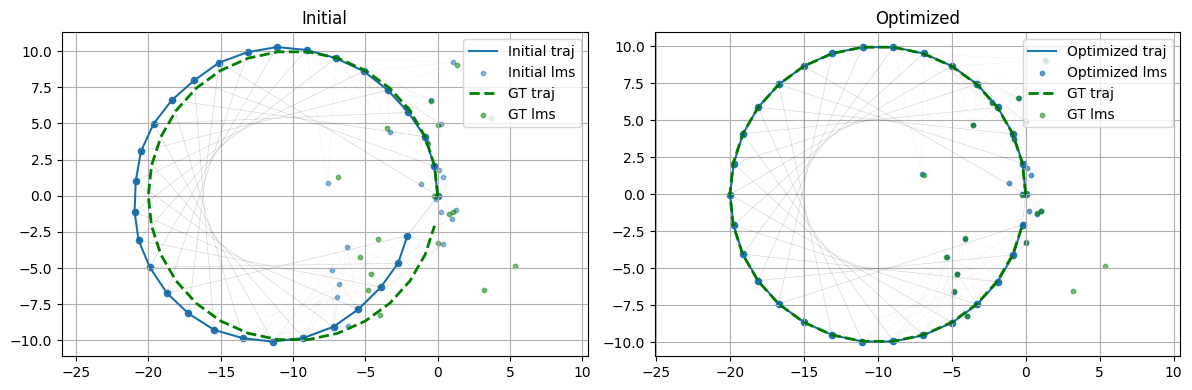

In [19]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)

# --- Helpers (SE(2), angles, indexing) ---
def wrap(a):
    return (a + np.pi) % (2*np.pi) - np.pi

def R2(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s],[s, c]])

def relative_pose(xi, xj):
    """Predicted odometry z_ij from poses xi->xj (both 3-vectors)."""
    RiT = R2(xi[2]).T
    dt = RiT @ (xj[:2] - xi[:2])
    dth = wrap(xj[2] - xi[2])
    return np.array([dt[0], dt[1], dth])

def compose(xi, z):
    """Compose pose xi with relative motion z (both 3)."""
    Ri = R2(xi[2])
    p = xi[:2] + Ri @ z[:2]
    th = wrap(xi[2] + z[2])
    return np.array([p[0], p[1], th])

def pose_slice(i):   # 3 per pose
    return slice(3*i, 3*i+3)

def lm_slice(N, k):  # after poses, 2 per landmark
    base = 3*N
    return slice(base + 2*k, base + 2*k + 2)

# --- Ground truth scenario ---
N = 30            # poses
M = 20            # landmarks
Rtraj = 10.0
theta = np.linspace(0, 2*np.pi, N, endpoint=False)

# Robot ground truth (circle, yaw tangent)
poses_gt = np.zeros((N,3))
poses_gt[:,0] = Rtraj*np.cos(theta)
poses_gt[:,1] = Rtraj*np.sin(theta)
poses_gt[:,2] = wrap(theta + np.pi/2)

# Anchor at origin/yaw 0
poses_gt[:,0] -= poses_gt[0,0]
poses_gt[:,1] -= poses_gt[0,1]
poses_gt[:,2] = wrap(poses_gt[:,2] - poses_gt[0,2])

# Landmarks ground truth
rad_lm = rng.uniform(-10.0, 10.0, M)
ang_lm = rng.uniform(0, 2*np.pi, M)
lms_gt = np.column_stack([rad_lm*np.cos(ang_lm), rad_lm*np.sin(ang_lm)])

# --- Build edges (odometry + loop closures + landmark observations) ---
edges_pp = []  # pose-pose
edges_pl = []  # pose-landmark

# Noise (std devs)
sig_odom_t   = 0.02
sig_odom_th  = 0.01
sig_rng      = 0.05
sig_brg      = 0.02

Omega_pp = np.diag([1/sig_odom_t**2, 1/sig_odom_t**2, 1/sig_odom_th**2])

# Odometry sequential edges
for i in range(N-1):
    j = i+1
    z = relative_pose(poses_gt[i], poses_gt[j])
    z_noisy = z + rng.normal(0, [sig_odom_t, sig_odom_t, sig_odom_th])
    z_noisy[2] = wrap(z_noisy[2])
    edges_pp.append((i, j, z_noisy, Omega_pp))

# Loop closures (i, i+10)
for i in range(N-10):
    j = i+10
    z = relative_pose(poses_gt[i], poses_gt[j])
    z_noisy = z + rng.normal(0, [sig_odom_t, sig_odom_t, sig_odom_th])
    z_noisy[2] = wrap(z_noisy[2])
    edges_pp.append((i, j, z_noisy, Omega_pp))

# Closing the loop explicitly (N-1 -> 0)
z = relative_pose(poses_gt[N-1], poses_gt[0])
z_noisy = z + rng.normal(0, [sig_odom_t, sig_odom_t, sig_odom_th])
z_noisy[2] = wrap(z_noisy[2])
edges_pp.append((N-1, 0, z_noisy, Omega_pp))

# Landmark observations: limit range and per-pose fan-out
Rmax = 9.0
max_obs_per_pose = 6
Omega_pl = np.diag([1/sig_rng**2, 1/sig_brg**2])

# Generate range-bearing measurements from GT with noise
for i in range(N):
    pi = poses_gt[i,:]
    # compute ranges to all landmarks
    d = lms_gt - pi[:2]
    dist = np.linalg.norm(d, axis=1)
    candidates = np.where(dist < Rmax)[0]
    if candidates.size == 0:
        continue
    # pick the closest K
    if candidates.size > max_obs_per_pose:
        # choose by smallest distances
        K_idx = candidates[np.argsort(dist[candidates])[:max_obs_per_pose]]
    else:
        K_idx = candidates
    for k in K_idx:
        dx, dy = lms_gt[k] - pi[:2]
        rng_true = np.hypot(dx, dy)
        brg_true = wrap(np.arctan2(dy, dx) - pi[2])
        z = np.array([rng_true, brg_true])
        z_noisy = z + rng.normal(0, [sig_rng, sig_brg])
        z_noisy[1] = wrap(z_noisy[1])
        edges_pl.append((i, k, z_noisy, Omega_pl))

# --- Initial guess ---
# Poses: integrate noisy odometry to inject drift
poses_est = np.zeros_like(poses_gt)
poses_est[0] = np.array([0.0, 0.0, 0.0])
# use sequential odom edges (first N-1 entries in edges_pp)
for i in range(N-1):
    _, _, z_meas, _ = edges_pp[i]
    # add extra drift to make it interesting
    drift = rng.normal(0, [0.05, 0.05, 0.02])
    z0 = z_meas + drift
    z0[2] = wrap(z0[2])
    poses_est[i+1] = compose(poses_est[i], z0)

# Landmarks: initialize from first observation using current pose guess
lms_est = np.full_like(lms_gt, np.nan)
seen = np.zeros(M, dtype=bool)
for (i, k, z, _) in edges_pl:
    if not seen[k]:
        r, b = z
        # back-project
        m = poses_est[i,:2] + R2(poses_est[i,2]) @ np.array([r*np.cos(b), r*np.sin(b)])
        lms_est[k] = m + rng.normal(0, [0.2, 0.2])  # small jitter
        seen[k] = True
# any never-seen landmark (should be few): set near origin with noise
for k in range(M):
    if not seen[k]:
        lms_est[k] = rng.normal(0, [1.0, 1.0])

# State vector [poses; landmarks]
x = np.zeros(3*N + 2*M)
for i in range(N):
    x[pose_slice(i)] = poses_est[i]
for k in range(M):
    x[lm_slice(N,k)] = lms_est[k]

# --- Cost and linearization ---
SKEW = np.array([[0, -1], [1, 0]])

def compute_total_cost(x):
    cost = 0.0
    # poses + landmarks views into x
    for (i, j, z, Omega) in edges_pp:
        xi = x[pose_slice(i)]; xj = x[pose_slice(j)]
        zhat = relative_pose(xi, xj)
        e = zhat - z
        e[2] = wrap(e[2])
        cost += 0.5 * e @ (Omega @ e)
    for (i, k, z, Omega) in edges_pl:
        xi = x[pose_slice(i)]
        mk = x[lm_slice(N,k)]
        d = mk - xi[:2]
        q = d @ d
        rhat = np.sqrt(q)
        phihat = wrap(np.arctan2(d[1], d[0]) - xi[2])
        e = np.array([rhat - z[0], wrap(phihat - z[1])])
        cost += 0.5 * e @ (Omega @ e)
    return cost

def linearize(x):
    D = 3*N + 2*M
    H = np.zeros((D,D))
    b = np.zeros(D)

    # Pose-pose edges
    for (i, j, z, Omega) in edges_pp:
        ii = pose_slice(i); jj = pose_slice(j)
        xi = x[ii]; xj = x[jj]
        pi, pj = xi[:2], xj[:2]
        RiT = R2(xi[2]).T
        Rij = RiT
        dp = pj - pi
        zhat = np.empty(3)
        zhat[:2] = Rij @ dp
        zhat[2] = wrap(xj[2] - xi[2])
        e = zhat - z
        e[2] = wrap(e[2])

        # Jacobians
        Ji = np.zeros((3,3)); Jj = np.zeros((3,3))
        # top-left 2x2
        Ji[:2,:2] = -Rij
        Jj[:2,:2] =  Rij
        # top theta columns (2x1)
        Ji[:2,2]  = -(Rij @ (SKEW @ dp))
        Jj[:2,2]  = 0.0
        # bottom row for yaw
        Ji[2,2] = -1.0
        Jj[2,2] =  1.0

        # Accumulate
        H[ii,ii] += Ji.T @ Omega @ Ji
        H[ii,jj] += Ji.T @ Omega @ Jj
        H[jj,ii] += Jj.T @ Omega @ Ji
        H[jj,jj] += Jj.T @ Omega @ Jj

        b[ii]    += Ji.T @ Omega @ e
        b[jj]    += Jj.T @ Omega @ e

    # Pose-landmark edges
    for (i, k, z, Omega) in edges_pl:
        ii = pose_slice(i); kk = lm_slice(N,k)
        xi = x[ii]; mk = x[kk]
        d = mk - xi[:2]
        dx, dy = d
        q = dx*dx + dy*dy
        r = np.sqrt(q)

        # Predicted measurement
        rhat = r
        phihat = wrap(np.arctan2(dy, dx) - xi[2])
        e = np.array([rhat - z[0], wrap(phihat - z[1])])

        # Jacobians (2x3 for pose, 2x2 for landmark)
        if r < 1e-8:
            continue  # skip degenerate (shouldn't happen with our sim)
        Jr_p = np.array([[-dx/r, -dy/r, 0.0],
                         [ dy/q, -dx/q, -1.0]])
        Jr_m = np.array([[ dx/r,  dy/r],
                         [-dy/q,  dx/q]])

        # Accumulate
        H[ii,ii] += Jr_p.T @ Omega @ Jr_p
        H[ii,kk] += Jr_p.T @ Omega @ Jr_m
        H[kk,ii] += Jr_m.T @ Omega @ Jr_p
        H[kk,kk] += Jr_m.T @ Omega @ Jr_m

        b[ii]    += Jr_p.T @ Omega @ e
        b[kk]    += Jr_m.T @ Omega @ e

    return H, b

# --- Levenberg-Marquardt optimization ---
lam = 1e-3
max_iters = 50
w_prior = 1e6       # strong prior on pose 0 -> anchor gauge
x_prior0 = np.array([0.0, 0.0, 0.0])

def apply_prior(H, b, x):
    H0 = np.eye(3) * w_prior
    H[:3,:3] += H0
    b[:3]    += H0 @ (x[:3] - x_prior0)
    return H, b

def boxplus(x, dx):
    x_new = x + dx
    # wrap all theta entries
    for i in range(N):
        x_new[3*i+2] = wrap(x_new[3*i+2])
    return x_new

cost = compute_total_cost(x)
print(f"Iter 00 | cost={cost:.6f}")

for it in range(1, max_iters+1):
    H, b = linearize(x)
    H, b  = apply_prior(H, b, x)

    # LM damping
    diagH = np.diag(H)
    A = H + lam * np.diag(diagH + 1e-12)

    # Solve
    try:
        dx = -np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        # add extra damping if needed
        dx = -np.linalg.lstsq(A + 1e-6*np.eye(A.shape[0]), b, rcond=None)[0]

    # Keep the anchor from drifting (optional, prior already fixes gauge)
    dx[:3] = 0.0

    x_trial = boxplus(x, dx)
    cost_trial = compute_total_cost(x_trial)

    if cost_trial < cost:  # accept
        x = x_trial
        improvement = cost - cost_trial
        cost = cost_trial
        lam = max(lam * 0.5, 1e-12)
        print(f"Iter {it:02d} | cost={cost:.6f} | Δ={improvement:.3e} | λ={lam:.2e} (accepted)")
        # convergence check
        if np.linalg.norm(dx) < 1e-6 or improvement < 1e-9:
            break
    else:                 # reject, increase damping
        lam = min(lam * 10.0, 1e12)
        print(f"Iter {it:02d} | cost={cost:.6f} | λ={lam:.2e} (rejected)")

# --- Extract estimates ---
poses_opt = np.zeros_like(poses_gt)
lms_opt   = np.zeros_like(lms_gt)
for i in range(N):
    poses_opt[i] = x[pose_slice(i)]
for k in range(M):
    lms_opt[k]   = x[lm_slice(N,k)]

# --- Plots ---
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

# Initial vs optimized trajectories and landmarks 
# plot trajectory with markers in the nodes
ax1.plot(poses_est[:,0], poses_est[:,1], lw=1.5, label='Initial traj')
ax1.scatter(poses_est[:,0], poses_est[:,1], s=20, c='C0')
ax1.scatter(lms_est[:,0], lms_est[:,1], s=10, alpha=0.5, label='Initial lms')
ax1.plot(poses_gt[:,0], poses_gt[:,1], 'g--', lw=2, label='GT traj')
ax1.scatter(lms_gt[:,0], lms_gt[:,1], c='g', s=10, alpha=0.5, label='GT lms')
# draw some edges for context (sparsely to keep it clean)
for (i,j,_,_) in edges_pp[::max(1,len(edges_pp)//200+1)]:
    pi, pj = poses_est[i,:2], poses_est[j,:2]
    ax1.plot([pi[0], pj[0]], [pi[1], pj[1]], 'k-', alpha=0.15, lw=0.5)
for (i,k,_,_) in edges_pl[::max(1,len(edges_pl)//400+1)]:
    pi, mk = poses_est[i,:2], lms_est[k]
    ax1.plot([pi[0], mk[0]], [pi[1], mk[1]], 'k-', alpha=0.05, lw=0.4)
ax1.set_title("Initial")
ax1.axis('equal'); ax1.grid(True); ax1.legend(loc='upper right')

ax2.plot(poses_opt[:,0], poses_opt[:,1], lw=1.5, label='Optimized traj')
ax2.scatter(poses_opt[:,0], poses_opt[:,1], s=20, c='C0')
ax2.scatter(lms_opt[:,0], lms_opt[:,1], s=10, alpha=0.7, label='Optimized lms')
ax2.plot(poses_gt[:,0], poses_gt[:,1], 'g--', lw=2, label='GT traj')
ax2.scatter(lms_gt[:,0], lms_gt[:,1], c='g', s=10, alpha=0.5, label='GT lms')
# draw some edges for context (sparsely to keep it clean)
for (i,j,_,_) in edges_pp[::max(1,len(edges_pp)//200+1)]:
    pi, pj = poses_opt[i,:2], poses_opt[j,:2]
    ax2.plot([pi[0], pj[0]], [pi[1], pj[1]], 'k-', alpha=0.15, lw=0.5)
for (i,k,_,_) in edges_pl[::max(1,len(edges_pl)//400+1)]:
    pi, mk = poses_opt[i,:2], lms_opt[k]
    ax2.plot([pi[0], mk[0]], [pi[1], mk[1]], 'k-', alpha=0.05, lw=0.4)
ax2.set_title("Optimized")
ax2.axis('equal'); ax2.grid(True); ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


---


#### 📸 <span style="color:#a4d4a3">Bundle Adjustment</span>

Bundle Adjustment is a typical problem solved through the least squares. It jointly optimizes <span style="color:#ffa500">**camera poses**</span> (extrinsics), sometimes <span style="color:#ffa500">**intrinsics**</span>, and <span style="color:#ffa500">**3D point positions**</span> so that projected points best match the observed image features.  

- <span style="color:#ffa500">**3D reconstruction**</span> based on images taken from different viewpoints.  

- Minimizes the <span style="color:#ffa500">**reprojection error**</span>.  

- Often uses <span style="color:#ffa500">**Levenberg-Marquardt**</span> optimization.  

- Developed in <span style="color:#ffa500">**photogrammetry**</span> during the 1950s.

---


#### ✔️ <span style="color:#a4d4a3">Summary</span>

- Graph-based SLAM for Landmarks

- The <span style="color:#ffa500">**rank**</span> of $\mathbf{H}$ matrix matters.

- <span style="color:#ffa500">**Levenberg-Marquardt**</span> for optimization.
